# Lab Assignment One: Exploring Table Data

# Team Member Information:

In [1]:
import pandas as pd
names = ['Jiaqi Song','Yuchao Zhang','Zhenxuan Ouyang','Jianmin Li']
smuid = [47534426, 47787029, 47784546, 47794972]
teaminfo = pd.DataFrame()
teaminfo['name'] = names
teaminfo['smu id'] = smuid
teaminfo

name    smu id
0       Jiaqi Song  47534426
1     Yuchao Zhang  47787029
2  Zhenxuan Ouyang  47784546
3       Jianmin Li  47794972

# 1.Business Understanding

#### In your own words, give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?). What is the prediction task for your data and why are other third parties interested in the result? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?

Business understanding:

Compared with spending on housing, food, and travel, medical expenses are also a big part for Americans. Those sudden emergencies threaten people like the sword of Damocles. Along with the emergency, there is a high medical bill which is unacceptable. Even for medical events within the plan, additional costs may be incurred because of unpredictable processes or results. Therefore, the prediction of medical expenses is extremely important for both patients and medical insurance institutions. Due to the development of data science in recent years, now, medical expenditures can be roughly predicted.

This data contains 6 attributes of 1388 people and their medical expenses billed by health insurance. These 6 attributes include gender, age, BMI, children included, smoking status and location. By visualizing this data, we can discover the intrinsic relationship between these attributes and their impact on health care spending. By analyzing the data, the insurance organization can know which kind of people are more likely to generate higher medical expenses, and design a more targeted insurance plan to ensure sufficient profits. The insured can also choose the appropriate insurance plan based on their possible medical expenses.

In summary, our analysis can make insurance institutions and insureds win-win.

Measure of success:

The goal pursued by each machine learning researcher is to achieve an accuracy rate of 100%. For our predictions of medical expenses, there are many uncontrollable factors that may affect the final results, such as traffic accidents. Therefore, our goal is to keep the prediction in a range of high confidence and accuracy. Within this range, if the predicted value is low, the actual medical expenses may be high, which may have a serious impact on patients and their families. If the predictions is high, the impact on the insured is simply to pay more premiums. Therefore, within the above range, the upper limit of the scope is more meaningful to the insured and the insurance institution.

Data source: https://www.kaggle.com/mirichoi0218/insurance

# 2. Data Understanding

## 2.1  Data description

#### Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  

In [2]:
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

# load the dataset 
df = pd.read_csv('insurance.csv')

# define different catagories according to age range
df['age_range'] = pd.cut(df.age, [0,20,30,50,1e6], labels=['teenager','young_adult','adult','senior'])

# define different categories of bmi level into health status
df['bmi_range'] = pd.cut(df.bmi, [0, 18.5, 25, 30, 80], labels=['underweight', 'healthweight', 'overweight', 'obese'])

df.head()

age     sex     bmi  children smoker     region      charges    age_range  \
0   19  female  27.900         0    yes  southwest  16884.92400     teenager   
1   18    male  33.770         1     no  southeast   1725.55230     teenager   
2   28    male  33.000         3     no  southeast   4449.46200  young_adult   
3   33    male  22.705         0     no  northwest  21984.47061        adult   
4   32    male  28.880         0     no  northwest   3866.85520        adult   

      bmi_range  
0    overweight  
1         obese  
2         obese  
3  healthweight  
4    overweight

In [3]:
# describe the data summary
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [4]:
# describe the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age          1338 non-null int64
sex          1338 non-null object
bmi          1338 non-null float64
children     1338 non-null int64
smoker       1338 non-null object
region       1338 non-null object
charges      1338 non-null float64
age_range    1338 non-null category
bmi_range    1338 non-null category
dtypes: category(2), float64(2), int64(2), object(3)
memory usage: 76.2+ KB


In [5]:
# Create a description table
df_describe = pd.DataFrame()
pd.set_option('max_colwidth',200)
df_describe['Features'] = df.columns
df_describe['Data_Type'] = ['Integer', 'Object', 'Float', 'Integer', 'Object', 
                            'Object', 'Float', 'Category', 'Category']
df_describe['Description'] = ['age of the person', 'gender of the person', 'body mass index (formula: Weight (lb) / (Height (in))² x 703)',
                             'the number of children covered by insurance', 'smoke or not', 'live in which part of region', 'individual medical costs billed by health insurance',
                             'belong to which range of age categoty', 'belong to which range of health status']
df_describe['Range'] = ['18-64', 'female or male', '15.9 - 53.2', '0-5', 'yes or no', 'southeast, southwest, northeast, northwest',
                       '1121.9 - 63770.5', 'teenager, young_adult, adult, senior', 'underweight, healthweight, overweight, obese']
df_describe

Features Data_Type  \
0        age   Integer   
1        sex    Object   
2        bmi     Float   
3   children   Integer   
4     smoker    Object   
5     region    Object   
6    charges     Float   
7  age_range  Category   
8  bmi_range  Category   

                                                     Description  \
0                                              age of the person   
1                                           gender of the person   
2  body mass index (formula: Weight (lb) / (Height (in))² x 703)   
3                    the number of children covered by insurance   
4                                                   smoke or not   
5                                   live in which part of region   
6            individual medical costs billed by health insurance   
7                          belong to which range of age categoty   
8                         belong to which range of health status   

                                          Range  
0                                         18-64  
1                                female or male  
2                                   15.9 - 53.2  
3                                           0-5  
4                                     yes or no  
5    southeast, southwest, northeast, northwest  
6                              1121.9 - 63770.5  
7          teenager, young_adult, adult, senior  
8  underweight, healthweight, overweight, obese

The table above shows the data type, description and range for each attribute respectively. 'age' and 'children' are integer, and 'bmi' and 'charges' are float. Although 'sex', 'smoker' and 'region' are String and defined as object, the same data type as 'age_range' and 'bmi_range', they will be treated as category for analysis purpose.

## 2.2 Data quality

#### Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation). 

In [6]:
# check if there are duplicated data
idx = df.duplicated()
print('The number of duplicated data: ' + str(len(df[idx])))

The number of duplicated data: 1


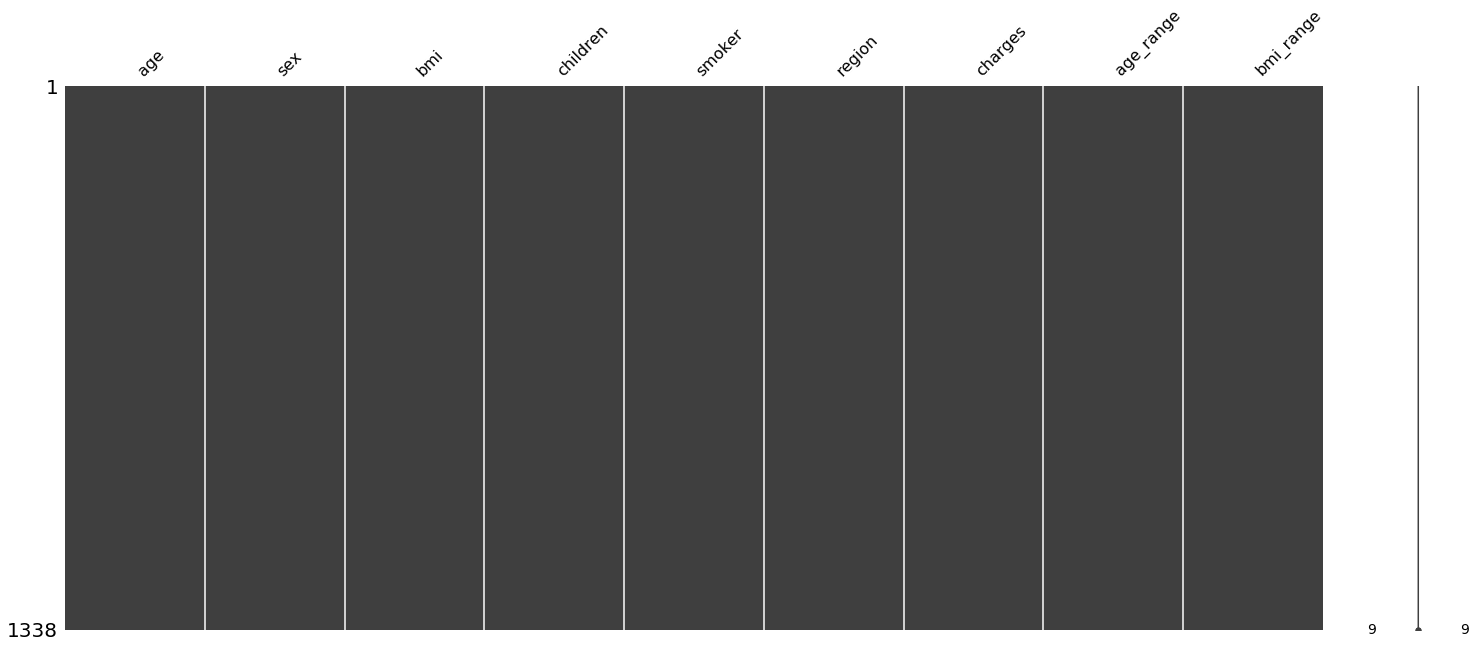

In [7]:
# use the missingno to directly find if there is any missing data
import missingno as mn
mn.matrix(df)

In [8]:
# describe the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age          1338 non-null int64
sex          1338 non-null object
bmi          1338 non-null float64
children     1338 non-null int64
smoker       1338 non-null object
region       1338 non-null object
charges      1338 non-null float64
age_range    1338 non-null category
bmi_range    1338 non-null category
dtypes: category(2), float64(2), int64(2), object(3)
memory usage: 76.2+ KB


Based on the dataframe information and missingno matrix, there is no missing values or data for this dataset with 1338 instance and 9 features (1338 x 9) (originally 7 features, then we create 2 more features for classification purpose).

But if there is a very small amount of missing data in some columns, we can simply drop those data because it's meaningless to use median impute for features in this dataset.

Besides, we find out that there is one duplicated data. However, because there isn't a 'id' column to identify each instances, and just only one is duplicated, we decided to keep it inside the dataset. 

# 3. Data Visualization


## 3.1 Visualization of Attribute Distributions

#### Visualize attribute distributions. Choose and visualize distributions for a subset of single attributes. Choose any appropriate visualization such as histograms, kernel density estimation, box plots, etc. Describe anything meaningful or potentially interesting you discover from these visualizations. Note: You can also use data from other sources to bolster visualizations. Visualize at least 5 attributes, at least one categorical and at least one numeric. 

### 3.1.1 Visualization of BMI

Text(0.5, 1.0, 'Distribution of bmi')

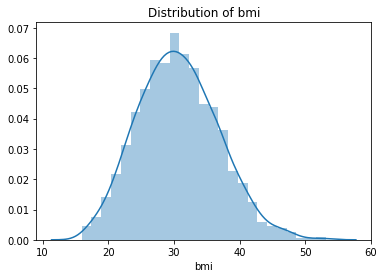

In [10]:
# Describe the distribution of bmi
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(df.bmi)
plt.title('Distribution of bmi')

From the distribution of bmi, we can conclude that most people's bmi is around 30, which is healthweight.

Text(0.5, 1.0, 'bmi and region')

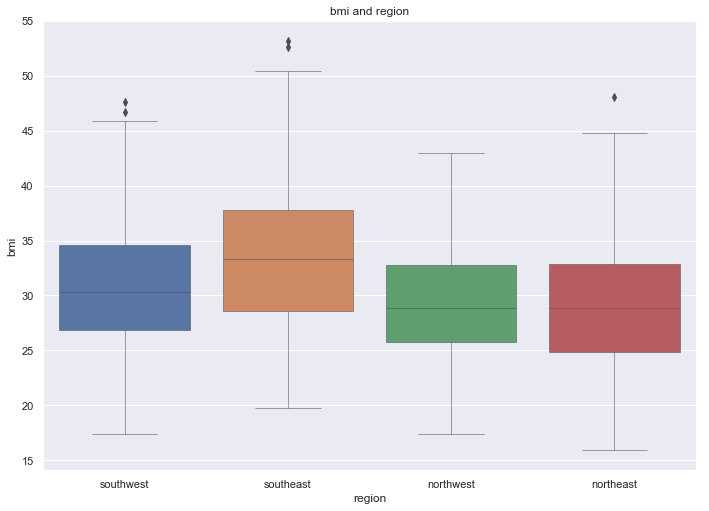

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# draw a boxplot to describe the distribution of bmi according to region
sns.boxplot(x='region', y='bmi', data=df, linewidth=0.5)
plt.title('bmi and region')

We draw a boxplot to show that there is a link between bmi and region. From the boxplot, we can see in southeastern area, people's bmi is higher than other regions. 
This is interesting, so we did some digging about 'Obesity in the United States'.
We found out that in the top 10 states of obesity ranking in America, 8 states are southeastern states including Mississippi, Alabama, Louisiana, South Carolina, Tennessee, Kentucky, Arkansas and West Virginia. (Reference: https://en.wikipedia.org/wiki/Obesity_in_the_United_States)

Text(0.5, 1.0, 'bmi and age range')

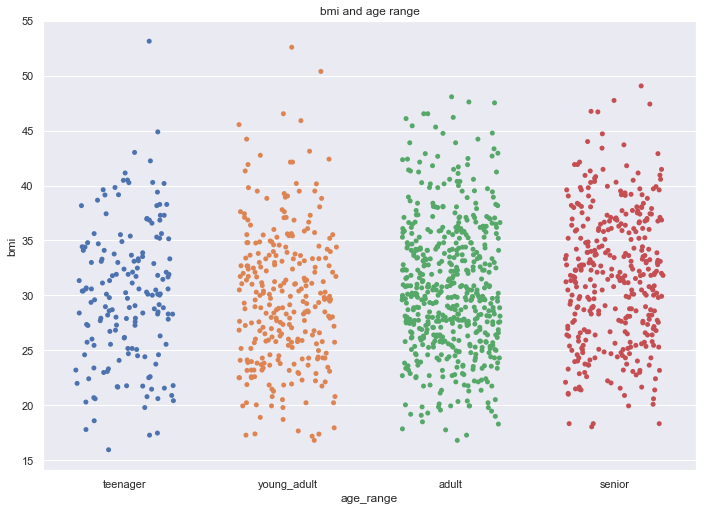

In [17]:
# draw a stripplot to describe the distribution of bmi according to age range
sns.stripplot(x='age_range',y='bmi',data=df,jitter=0.3).set_title('bmi and age range')

From the stripplot above, We found out that age can also influence bmi. With people get older, their bmi get higher too.
It's understandable because in a medical article, it points out that when people get older, slightly higher BMI may help protect old people from thinning of the bones (osteoporosis). (Reference: https://medlineplus.gov/ency/article/007196.htm)

### 3.1.2 Visualization of Charges(Medical Bill Paid By Insurance Companies)

Text(0.5, 1.0, 'Distribution of charges')

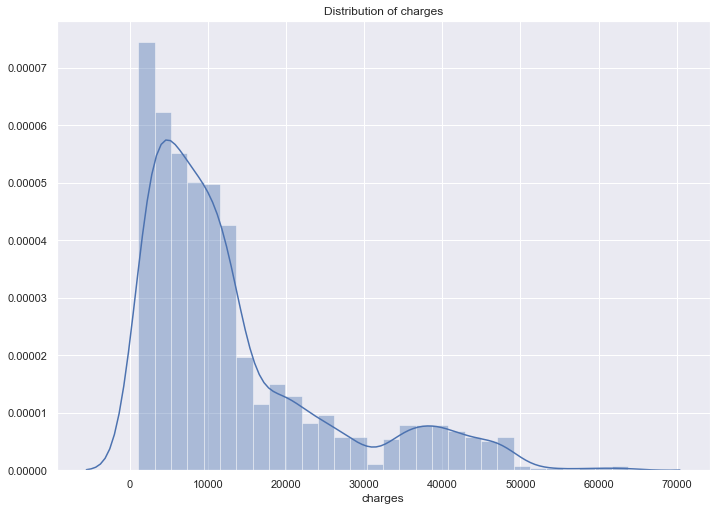

In [18]:
# draw distribution of charges(Individual medical costs billed by health insurance)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(df.charges)
plt.title('Distribution of charges')

From the distribuation of charges, we can see most people's charges(medical bill) paid by insurance companies is under $20,000.

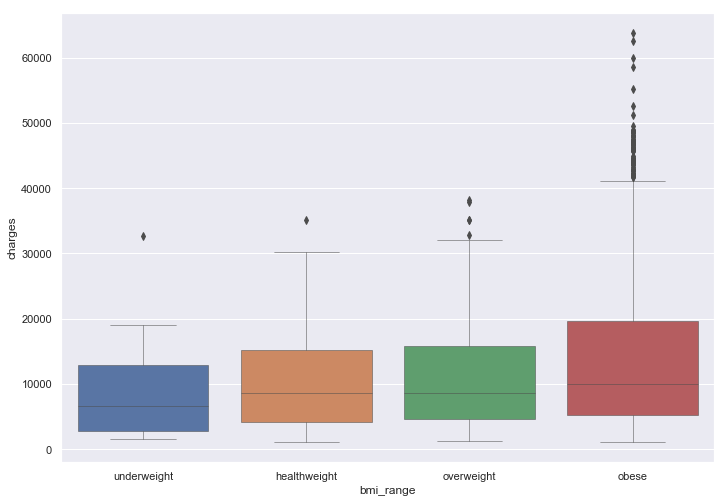

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# draw a boxplot to show charges are influenced by bmi range
sns.boxplot(x='bmi_range', y='charges', data=df, linewidth=0.5)

From the boxplot above, we can see the amount of charges(medical bills paid by insurance companies) are influenced by bmi. The higher your bmi is, the higher your charges(medical bills paid by insurance companies) are. So the insurance companies should pay more attention on people with high bmi, it could help insurance companies set standard for charging insurance fee. And people need to stay healthy if they want to spend less on insurance charges, people who have higher bmi should exercise a lot.

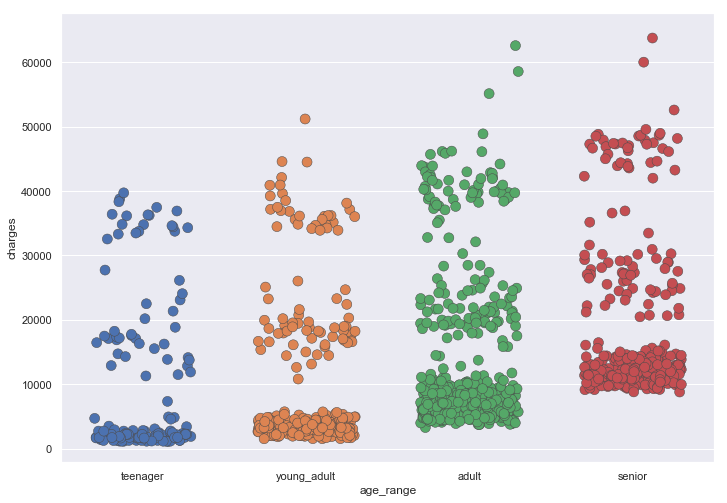

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# draw a boxplot to show how charges are influenced by age range
sns.stripplot(x='age_range', y='charges', data=df, linewidth=0.5, size=10, jitter=0.3)

We drew a stripplot to see if age influence charges(medcial bills) too. The older you get, the more likely you need to pay more on your medical bills.

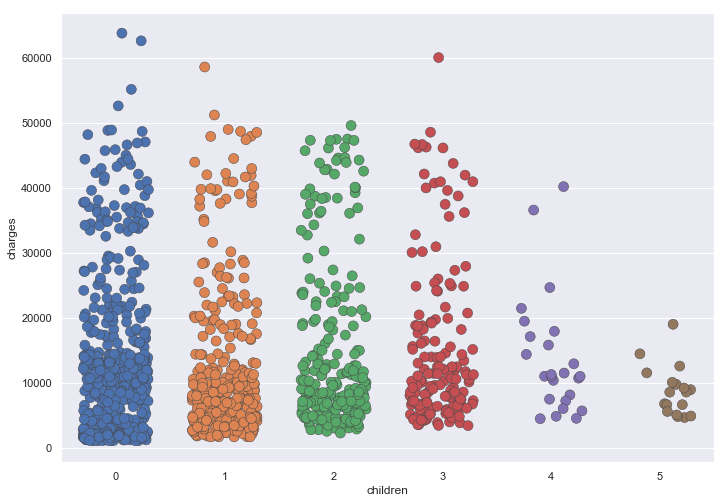

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# draw a boxplot to show how charges are influenced by age range(Number of children covered by health insurance / Number of dependents)
sns.stripplot(x='children', y='charges', data=df, linewidth=0.5, size=10, jitter=0.3)

From the stripplot above between charges and children(Number of children covered by health insurance / Number of dependents), we found out an interesting phenomenon. We were thinking that charges(medical bills paid by insurance companies) should be higher with more children. But in fact, we notice that the more children that are covered by insurance, the lower medical bills paid by insurance companies.

### 3.1.3 Visualization of Age

Text(0.5, 1.0, 'Distribution of age')

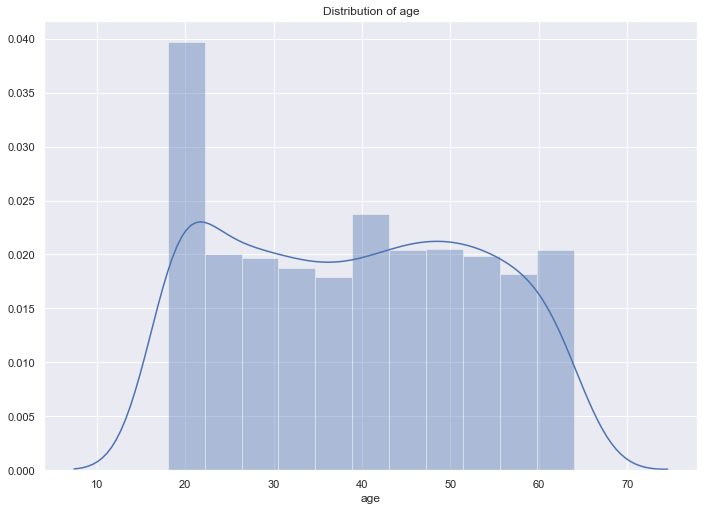

In [22]:
# Describe the distribution of age
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.distplot(df.age)
plt.title('Distribution of age')

From the distribution of age, we know age from 20 to 30 is the largest group of people in this dataset. But generally speaking, the distribution of age is uniform.

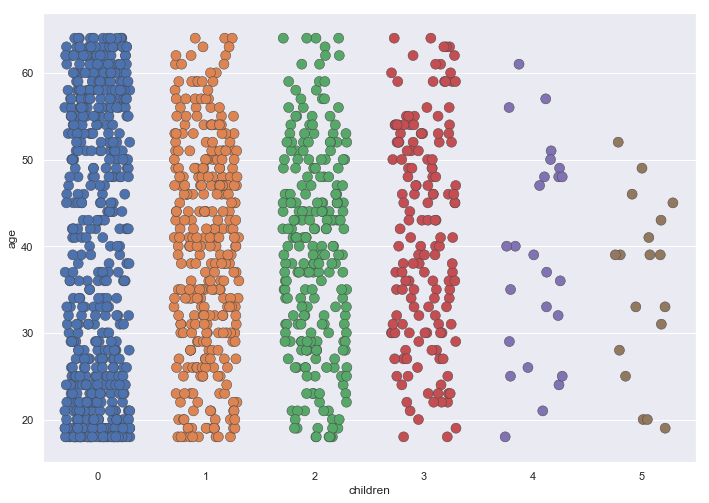

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# jitter can make the distribution more clear
sns.stripplot(x='children', y='age', data=df, linewidth=0.5, size=10, jitter=0.3)

From age-children stripplot, we can see that most people's children attribute is under 4 and people with children attribute that is more than 3 are usually under 50. We assume that attribute children(Number of children covered by health insurance / Number of dependents) is proportional to the number of children the dependents have. From there, we can assume the larger attribute children is, the more number of children the dependents have. It's reasonable that nowadays, people don't want to have too many kids or don't want to have kid at all in some countries. And even if people want to have more children, they have to have enough resource and energy including enough financial resource and good health condition. We think that can explain why people with children attribute is 5 tend to be younger.

### 3.1.4 Visualization of Children(Number of children covered by health insurance / Number of dependents) Distribution

Text(0.5, 1.0, 'Distribution of children')

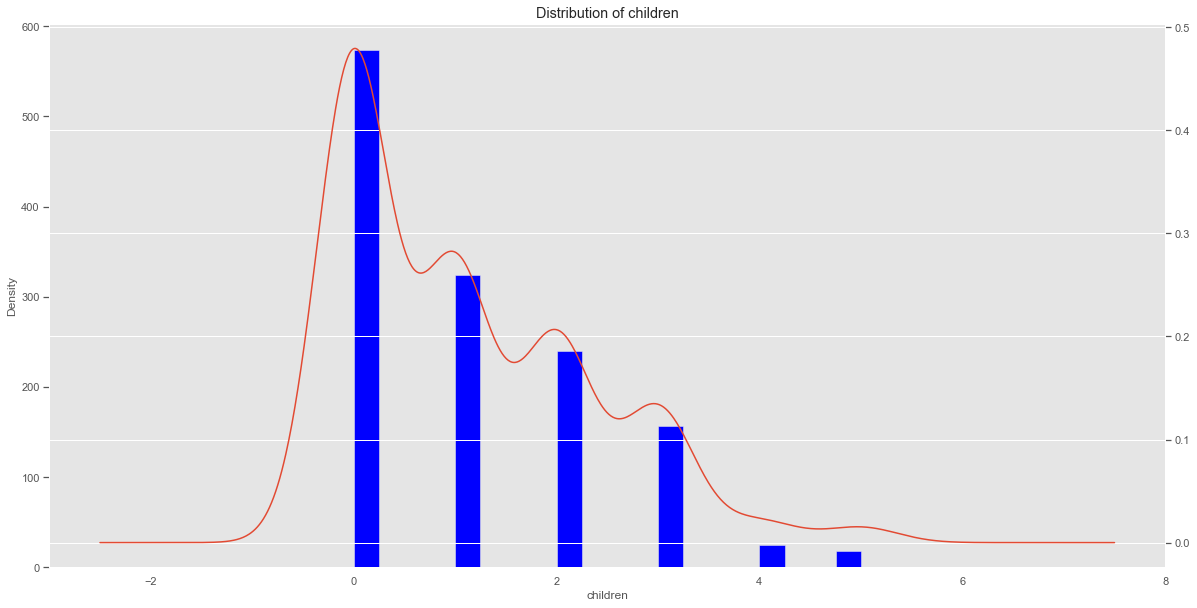

In [25]:
plt.style.use('ggplot')

plt.figure(figsize=(20,10))

# Describe the children frequency distribution
hist = df.children.plot.hist(bins=20, color='blue')
# Describe the children frequency using kde.
kde = df.children.plot.kde(secondary_y=True, bw_method=0.3)
hist.set_xlabel('children')
plt.title('Distribution of children')

From the distribution of number of children attribute, we know there is a large part of people that have no child or no children that are covered by insurance in this dataset and only a small part of people with children attribute that is more than 3.

### 3.1.5 Visualization of Smoking, Children and Age

In [26]:
# Replace somker with 1 and non-smoker with 0.
df_change_smoker = df.replace(to_replace={'yes':1,'no':0})

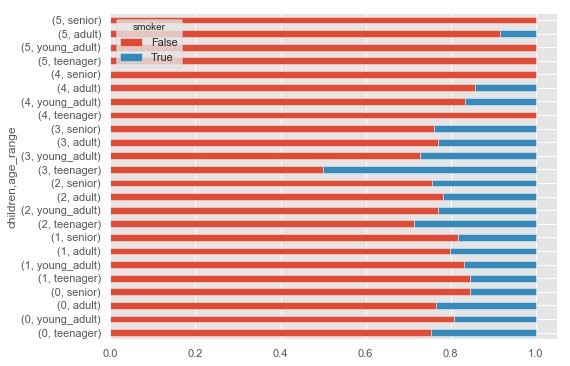

In [27]:
# group by age range and children
df_group1 = df_change_smoker.groupby(by=['age_range','children'])
# draw a crosstab divided by smoker
smoke = pd.crosstab([df_change_smoker['children'], df_change_smoker['age_range']], df_change_smoker.smoker.astype(bool))
smoke_rate = smoke.div(smoke.sum(1).astype(float),axis=0)
smoke_rate.plot(kind='barh', stacked=True, figsize=(8,6))
plt.show()

In [28]:
#group by children
df_group_by_children = df_change_smoker.groupby(by='children')
df_group_by_age_range = df_change_smoker.groupby(by='age_range')

#Now let's calculate the smoking rate of each group
print('The smoking Rate for group of different number of children:')
print(df_group_by_children.smoker.sum() / df_group_by_children.smoker.count())
print('The smoking Rate for group of different age range:')
print(df_group_by_age_range.smoker.sum() / df_group_by_age_range.smoker.count())

The smoking Rate for group of different number of children:
children
0    0.200348
1    0.188272
2    0.229167
3    0.248408
4    0.120000
5    0.055556
Name: smoker, dtype: float64
The smoking Rate for group of different age range:
age_range
teenager       0.234940
young_adult    0.201439
adult          0.213755
senior         0.179775
Name: smoker, dtype: float64


Before we talk about this drawing, we assume attribute "children"(Number of children covered by health insurance / Number of dependents) is proportional to the number of children the dependents have. So we can assume people with higher "children" attribute would have more children.
First, we group people according to their age range and the attribute "children" and we drew a crosstab to see which group of people is more likely to be smokers. 
Then we also group people according to attribute "children" and calculate smoking rate of each group. We also group people according to age range and calculate smoking rate of each group.
From above, we can see teenager have highest smoking rate and senior have lowest smoking rate.
We can also see when people's children attribute is more than 3(let's assume people who have more than 3 children), smoking rate will drop, maybe it's because people are busy with looking after their children, they don't have time to do that. But people whose children attribute is 3(let's say people who have 3 children) have the highest smoking rate, we try to find out why, from an article(Reference: https://mom.me/baby/7607-three-kids-right-number/), we know that it's easier having less than 3 children or more than 4 children compared to having 3 children. Having children is painful and stressful, maybe that's why people with 3 children are more likely to smoke. Here's what article say: “Four is easier because the kids can pair off. Especially when you have two of each. With three there is one left out. Also when it was three the baby got treated more like a baby for some reason. With four you can't indulge the youngest and she's more likely to try and keep up with the others.”(Reference: https://mom.me/baby/7607-three-kids-right-number/)

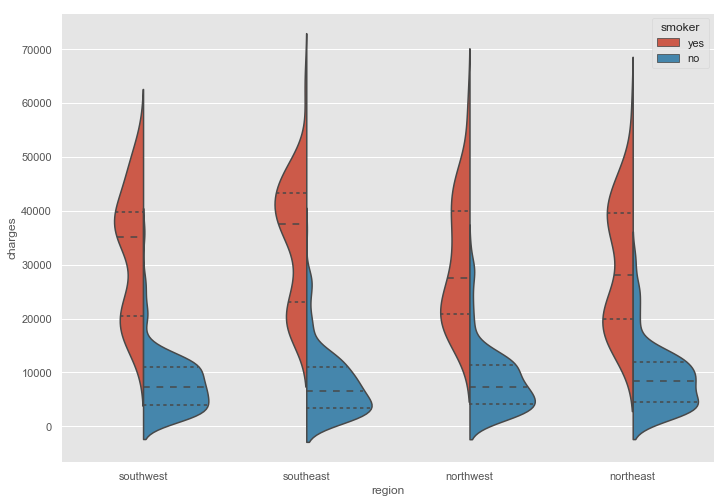

In [29]:
# draw a violoin plot to show region, charges and how smoking influence charges(medical bills paid by insurance companies)
sns.violinplot(x="region", y="charges", hue="smoker", data=df, 
               split=True, inner="quart")

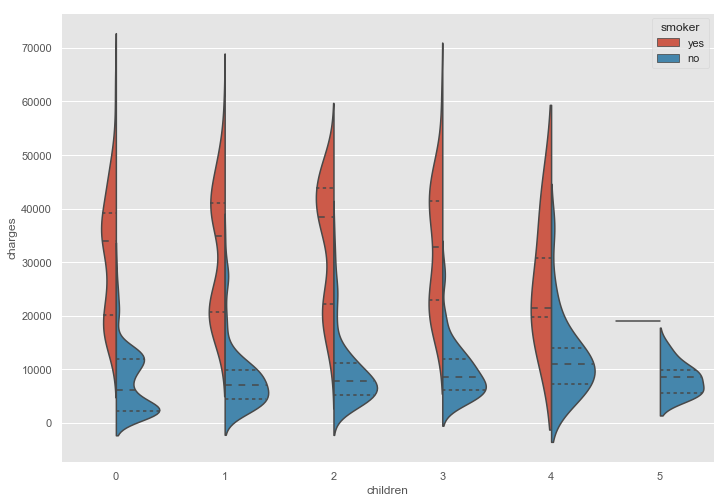

In [30]:
# draw a violoin plot to show children, charges and how smoking influence charges(medical bills paid by insurance companies)
sns.violinplot(x="children", y="charges", hue="smoker", data=df, 
               split=True, inner="quart")

We drew two violin plots between charges, region and smoker and between charges, region and smoker. According to the first violin above, people in different regions have similar spread and shape of charges(medical bill paid by insurance companies). However in the same region, the distributions of people who smoke is approximately uniform, but the distributions of people who don't smoke is not.
Along with the second violin plot, we can clearly conclude that, no matter where people come from or how many children they have that are covered by insurance, people who don't smoke will have less charges(medical bill paid by insurance companies) than people who smoke. So the insurance companies should pay more attentions on smoker because they may cause higher medical bills. These plots could help insurance companies set standard for charging insurace fee. And people who smoke should also pay more attentions if they want to spend less on their medical bills or insurance fees.

## 3.2 Data Relationship Exploration

### 3.2.1 Correlation Plot

#### Visualize relationships between a subset of attributes. Use whichever visualization method is appropriate for your data. Explain any interesting relationships. Important: Interpret the implications for each visualization. Visualize at least three subsets of the attributes.# 

Text(0.5, 1.0, 'Correlation Heatmap')

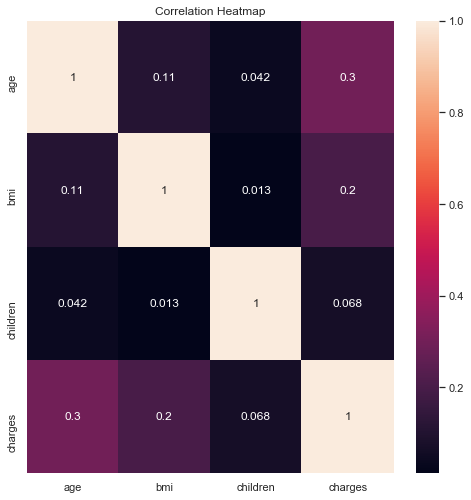

In [31]:
# set the plotting style
cmap = sns.set(style="darkgrid")

# set the figure size
f, ax = plt.subplots(figsize=(7, 7))

# exclude the NaN/null or object datatypes and plot the correlation map
sns.heatmap(df.corr(), cmap=cmap, annot=True)

f.tight_layout()
plt.title('Correlation Heatmap')

Based on the correlation matrix graph we get above, 'age', 'bmi', 'children' and 'charges' are all positively correlated with each other. Because the graph is symmetric, we just focus on the left part of it. The graph shows that 'charges & bmi' and 'charges & age' are comparatively strong correlated with each other, which means more aged people are, or higher bmi people have, the higher costs health insurance have to pay for them. Although 'charges & children' also has a positive correlation, it doesn't correlated with each as strong as 'charges & bmi' and 'charges & age' do.

### 3.2.2 Scatter Plot 

F:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


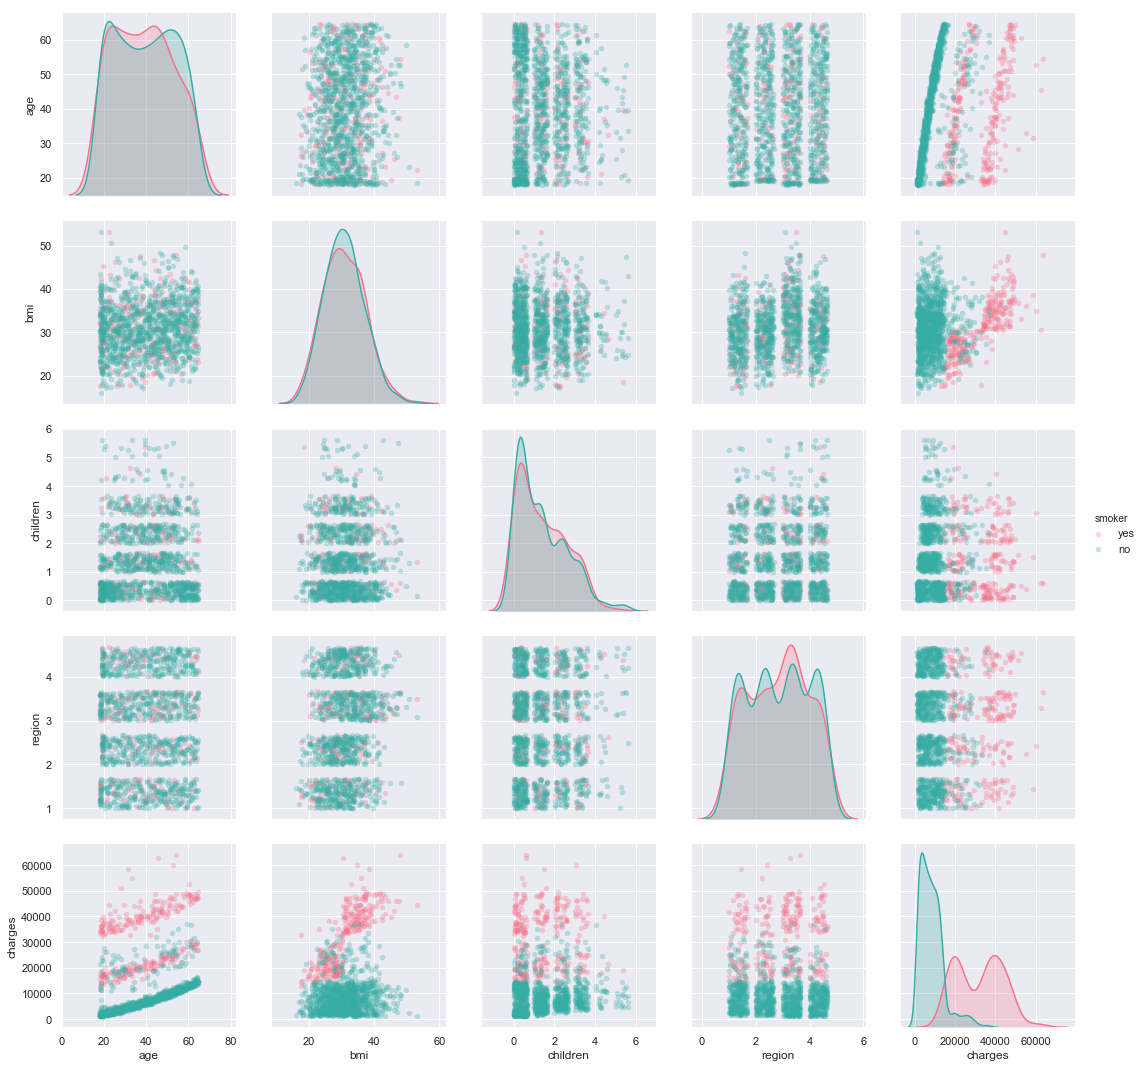

In [34]:
# replace 4 regions with 4 different number
df_changeregion = df.replace(to_replace={'northeast':1,'northwest':2,'southeast':3,'southwest':4})

# make a copy of the dataframe
df_jitterregion = df_changeregion.copy()

# add jitters for plotting
df_jitterregion[['age','bmi','children','region']] += np.random.rand(len(df),4)/1.5

sns.set_palette('bright')
sns.pairplot(df_jitterregion, hue="smoker", size=3,
            plot_kws=dict(s=30, alpha=0.3, linewidth=0), palette='husl')
plt.show()

From the pairplot graph of 6 attributes, we have a more direct visual understanding of these attribute. Above, we color it whether people smoke or not. The Red dot represents the 'do smoke' people, and the Green dot is for the 'NOT smoke' people.

The graph shows clearly that people who do smoke have higher costs which are billed by the health insurance than those who do not smoke. The health insurance company may increase the next-year-premiums of people who smoke according to the result above.

Besides, we find out that 'region' is not a strong impact factor for medical charges, but people who live in NO.3 (southeast) region have slightly higher bmi compared to other regions. Maybe the 'southeast' is a costal or wealthier area where people have nutritious diet.

# Dimensionality Reduction

#### You have free reign to provide any additional analyses. 

#### One idea (required for 7000 level students): implement dimensionality reduction using t-SNE, then visualize and interpret the results. Give an explanation of t-SNE dimensionality reduction methods. 


In [35]:
# Import the 2 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
%matplotlib inline

In [36]:
# Import the dataset
insurance = pd.read_csv('insurance.csv')
# The dataset has 1338 instances and 7 features
display(insurance.shape)

(1338, 7)

In [37]:
# Set our target as the 'charges'
target = insurance['charges']
target_names='charges'
Y = target
# Delete the column of target from our table
insurance = insurance.drop("charges",axis=1)

In [38]:
# Change the strings to numerical type
insurance = insurance.replace(to_replace={'yes':0, 'no':1})
insurance = insurance.replace(to_replace={'male':0, 'female':1})
insurance = insurance.replace(to_replace={'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [39]:
# Since each feature's data has different unit, we need to standarize the data
from sklearn.preprocessing import StandardScaler
X = insurance.values
X = StandardScaler().fit_transform(X)

In [40]:
# Use PCA from sklearn.decomposition
pca = PCA(n_components=2)
# Fit data and transform it
pca.fit(X)
X_pca = pca.transform(X)

Text(0, 0.5, '-0.33*age -0.66*sex +0.00*bmi +0.03*children -0.67*smoker -0.02*region ')

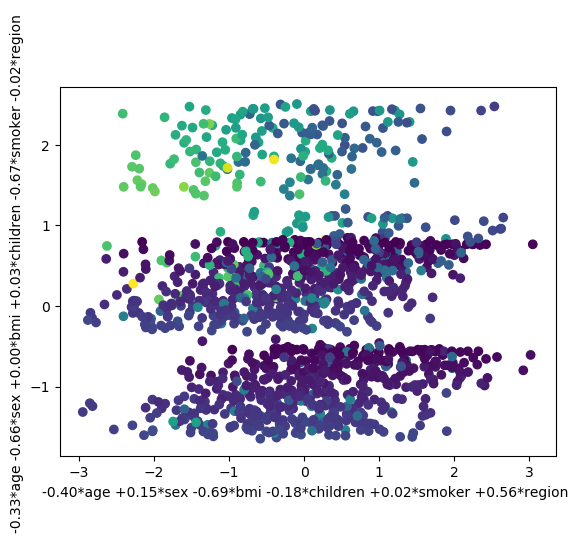

In [43]:
# this function definition just formats the weights into readable strings (from class notes).
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:8])
        tmp_array.append(tmp_string)
    return tmp_array
  
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, insurance.columns) 

# Scatter plot the output
from matplotlib.pyplot import scatter
plt.style.use('default')
ax = scatter(X_pca[:,0], X_pca[:,1], c=Y)
plt.xlabel(pca_weight_strings[0]) 
plt.ylabel(pca_weight_strings[1])

Using PCA, we reduce the data dimension from 6 to 2. From the above plot, we can approximately separate the dataset to three clusters. Since we are using charges as our target, the light points mean relatively small charges, and the dark points mean large charges. Basically, PCA separates the dataset based on the amount of charges, small charges in one cluster, and large charges in another two clusters. We also want to know how accurate these clusters are. So we check the explained variance which is talked about in class.

In [45]:
# Explained variance function from class notes.
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Scatter, Marker, Layout, layout,XAxis, YAxis, Bar, Line
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=layout.XAxis(title='Principal components'), yaxis=layout.YAxis(title='Explained variance ratio'))
    })
        
pca = PCA(n_components=4)
X_pca = pca.fit(X)
plot_explained_variance(pca)

From the above plot, we find out that using the first two components represents 38.20% of the original data's information, which is not enough if we want to get an accurate representation of the original data using lower dimensions. So, we try to reduce the dimension using t-SNE in the following section.

In [46]:
# Use TSNE from sklearn.manifold
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

Text(0, 0.5, 'Principal Component 2')

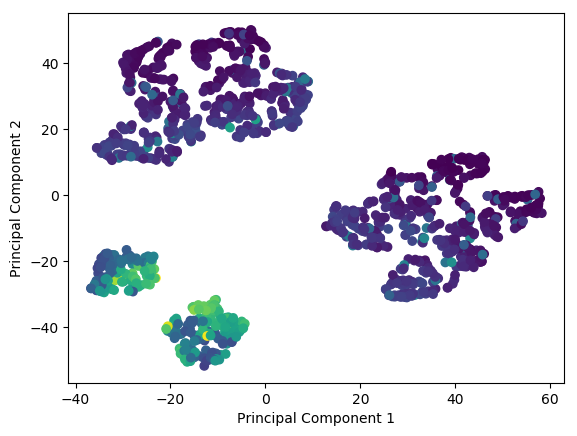

In [48]:
# Scatter plot the output
ax = scatter(X_tsne[:,0], X_tsne[:,1], c=Y)
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2')

We can see that t-SNE separates the data into 4 clusters with no intersection which is good for the classification later. Also, t-SNE separates the data according to the amount of charges approximately, the lower charges cluster together, and the large charges cluster together. More than that, there are two similar clusters for lower charges and two similar clusters for large charges which implies that besides the amount of charges, there are other features that help us to cluster the data.